In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [2]:
%matplotlib inline
style.use('ggplot')

In [3]:
stop_words = set(stopwords.words('english'))

In [4]:
df = pd.read_csv('../data/external/amazon_alexa.tsv', sep= "\t")
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


<Axes: xlabel='rating', ylabel='count'>

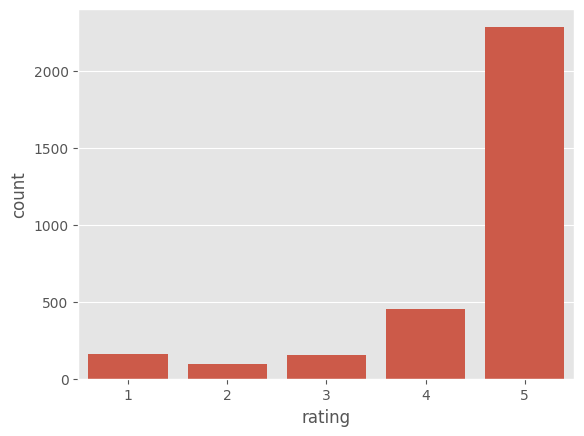

In [6]:
sns.countplot(x = 'rating', data = df)

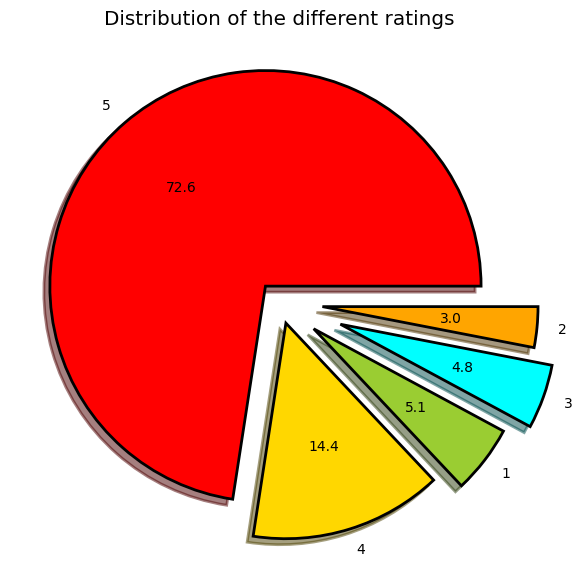

In [7]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'gold', 'yellowgreen', 'cyan', 'orange')
wp = {'linewidth' : 2, 'edgecolor' : 'black'}
tags = df['rating'].value_counts()
explode = (0.1, 0.1, 0.2, 0.3, 0.2)
tags.plot(kind='pie', autopct = '%1.1f',colors=colors, shadow = True,
          startangle = 0, wedgeprops = wp, explode = explode, label = '')
plt.title('Distribution of the different ratings')
plt.show()

<Axes: xlabel='count', ylabel='variation'>

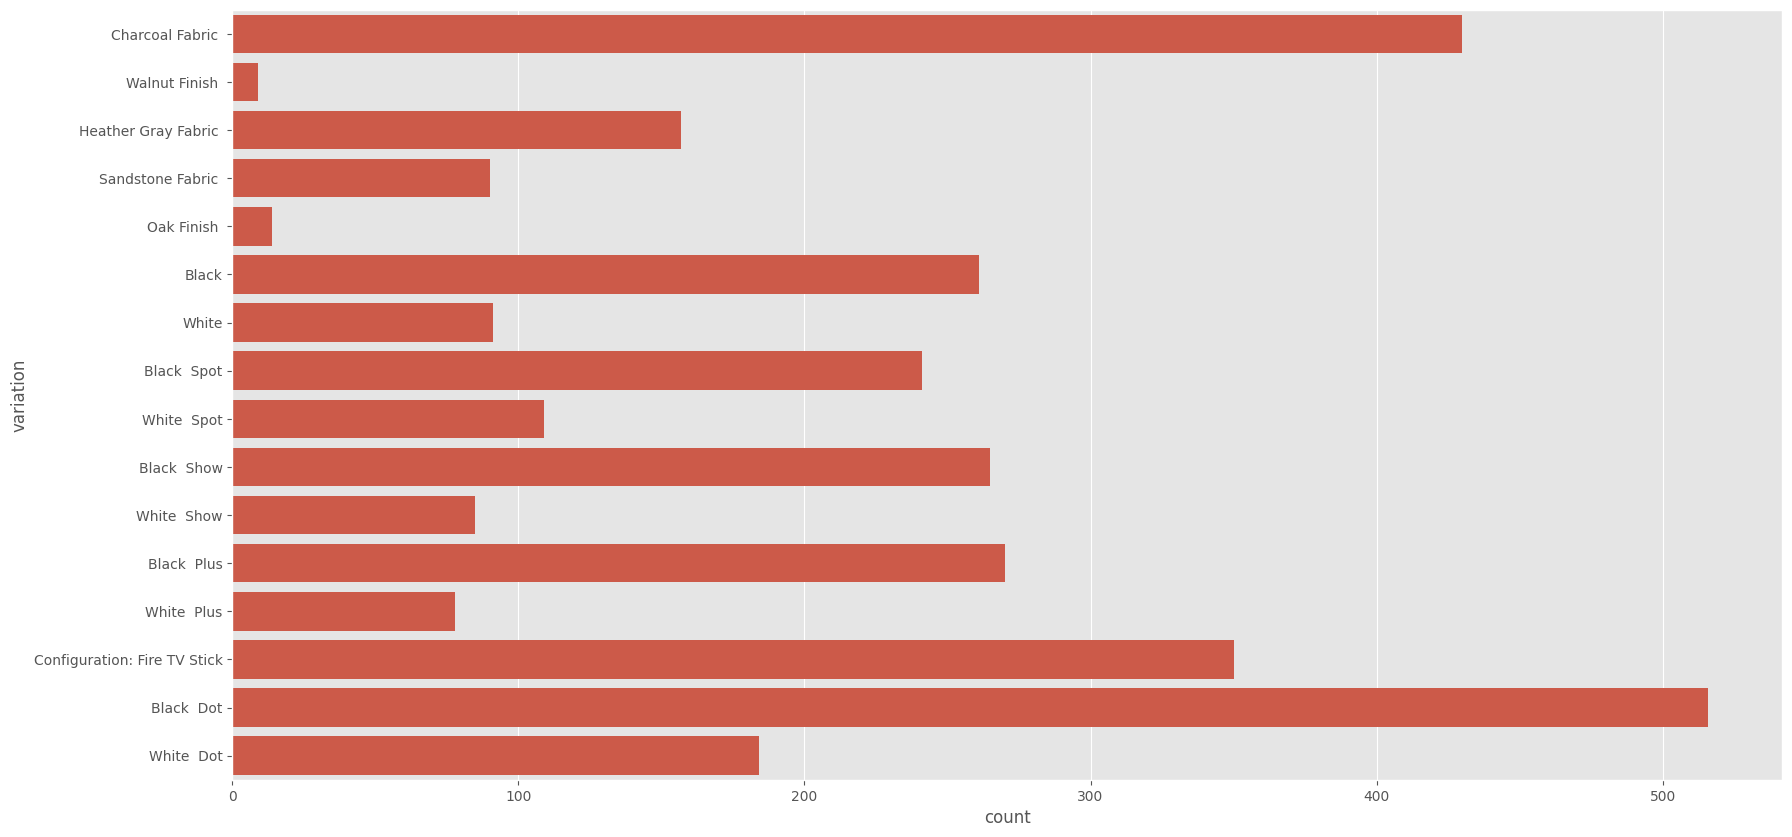

In [8]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y='variation', data=df)

In [9]:
df['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

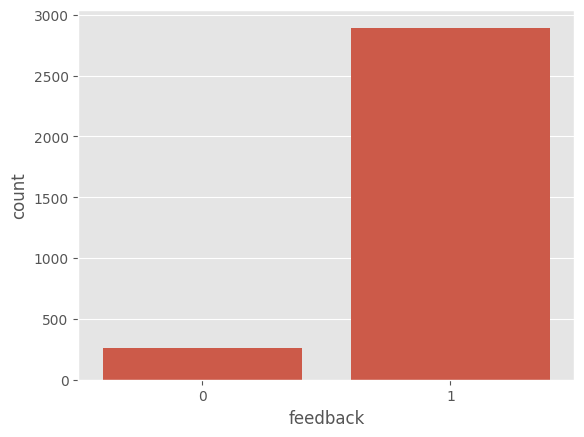

In [10]:
sns.countplot(x = 'feedback', data = df)
plt.show()

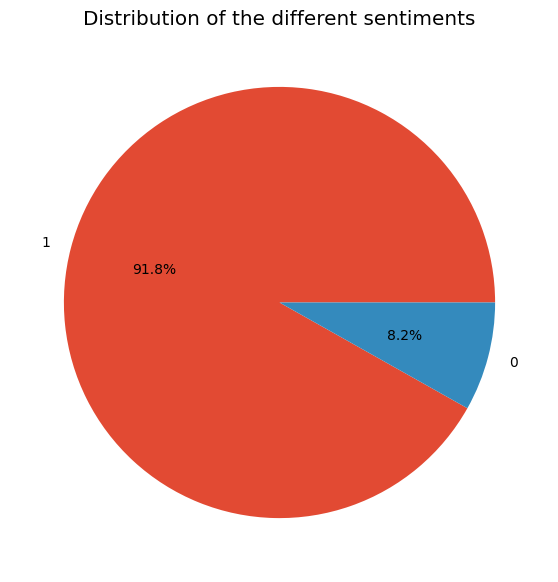

In [11]:
fig = plt.figure(figsize=(7,7))
tags = df['feedback'].value_counts()
tags.plot(kind = 'pie', autopct = '%1.1f%%', label = '')
plt.title('Distribution of the different sentiments')
plt.show()

In [12]:
def data_processing(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r"http\S+www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [13]:
df.verified_reviews = df['verified_reviews'].apply(data_processing)


In [14]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [15]:
df['verified_reviews'] = df['verified_reviews'].apply(lambda x:  stemming(x))

In [16]:
pos_review = df[df.feedback == 1]
pos_review.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love echo,1
1,5,31-Jul-18,Charcoal Fabric,loved,1
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1
3,5,31-Jul-18,Charcoal Fabric,lot fun thing 4 yr old learns dinosaurs contro...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


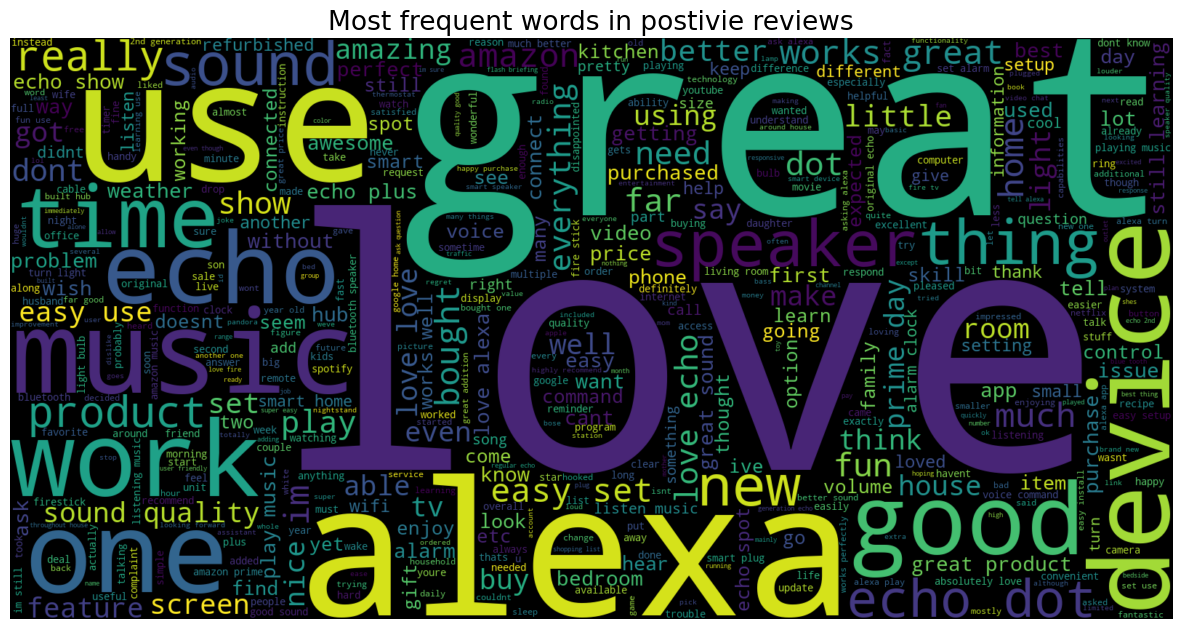

In [17]:
text = ' '.join([word for word in pos_review['verified_reviews']])
plt.figure(figsize=(15,10), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Most frequent words in postivie reviews', fontsize = 19)
plt.show()

In [18]:
neg_review = df[df.feedback == 0]
neg_review.head()

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,like siri fact siri answers accurately alexa d...,0
111,2,30-Jul-18,Charcoal Fabric,sound terrible u want good music get bose,0
141,1,30-Jul-18,Charcoal Fabric,much features,0
162,1,30-Jul-18,Sandstone Fabric,stopped working 2 weeks didnt follow commands ...,0
176,2,30-Jul-18,Heather Gray Fabric,sad joke worthless,0


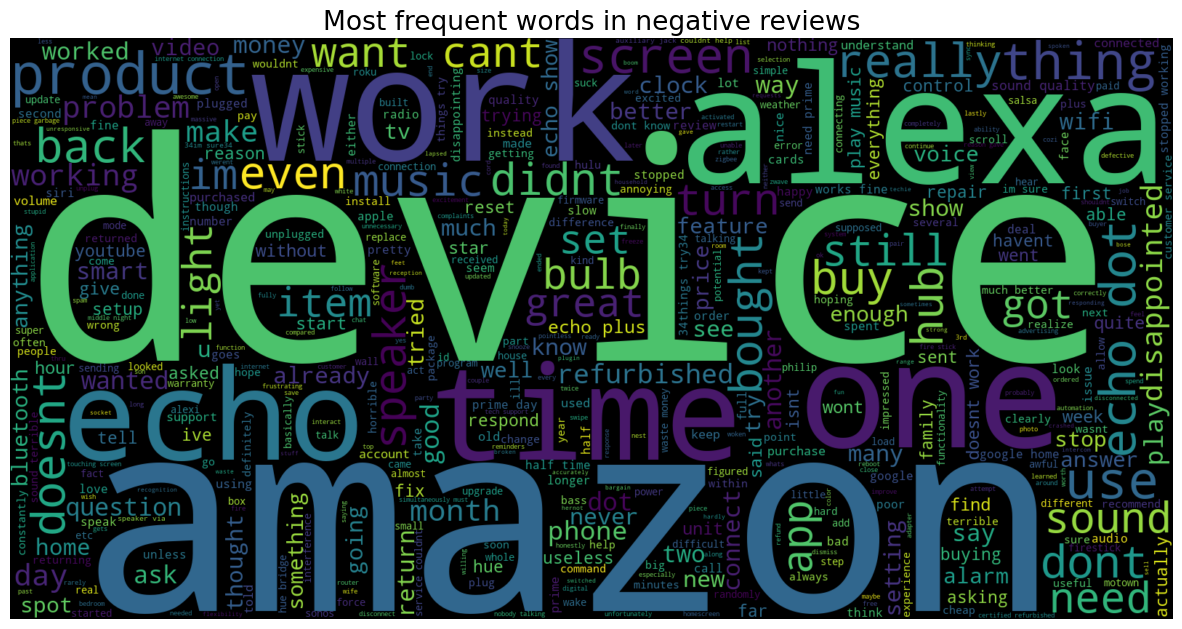

In [19]:
text = ' '.join([word for word in neg_review['verified_reviews']])
plt.figure(figsize=(15,10), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [20]:
X = df['verified_reviews']
Y = df['feedback']

In [21]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [24]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [25]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
history = model.fit(x_train, y_train, batch_size = 16, epochs=20)


Epoch 1/20
158/158 [==============================] - 2s 10ms/step - loss: 0.0253 - accuracy: 0.9917
Epoch 2/20
158/158 [==============================] - 1s 8ms/step - loss: 0.0246 - accuracy: 0.9917
Epoch 3/20
158/158 [==============================] - 1s 7ms/step - loss: 0.0235 - accuracy: 0.9921
Epoch 4/20
158/158 [==============================] - 1s 6ms/step - loss: 0.0236 - accuracy: 0.9921
Epoch 5/20
158/158 [==============================] - 1s 8ms/step - loss: 0.0227 - accuracy: 0.9925
Epoch 6/20
158/158 [==============================] - 1s 6ms/step - loss: 0.0218 - accuracy: 0.9925
Epoch 7/20
158/158 [==============================] - 1s 5ms/step - loss: 0.0212 - accuracy: 0.9929
Epoch 8/20
158/158 [==============================] - 1s 5ms/step - loss: 0.0205 - accuracy: 0.9933
Epoch 9/20
158/158 [==============================] - 1s 5ms/step - loss: 0.0204 - accuracy: 0.9933
Epoch 10/20
158/158 [==============================] - 1s 5ms/step - loss: 0.0201 - accuracy: 0.993

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

20/20 [==============================] - 0s 8ms/step - loss: 0.8776 - accuracy: 0.9397
Test Loss: 0.8775578737258911
Test Accuracy: 0.9396825432777405


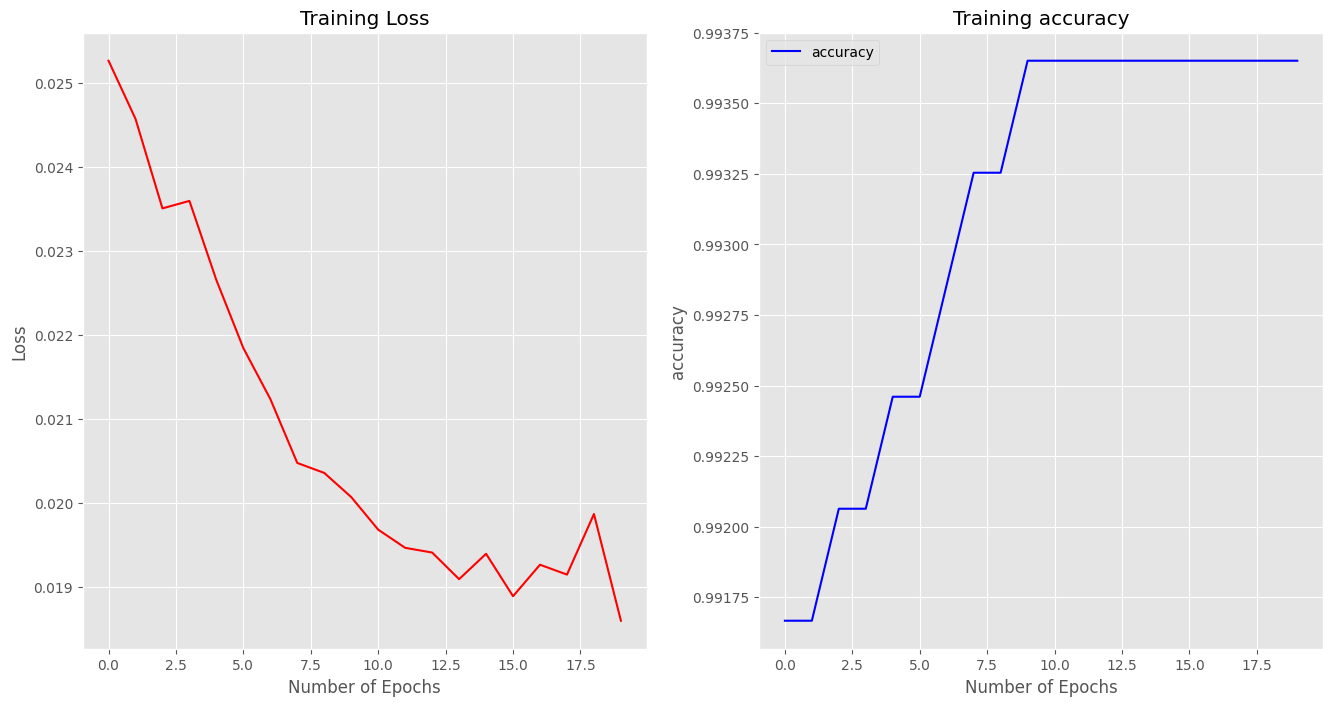

In [33]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [34]:
model.save_weights('../models/model')

In [37]:
# Load the previously saved weights
model.load_weights('../models/model')

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

20/20 [==============================] - 0s 8ms/step - loss: 0.8776 - accuracy: 0.9397
Test Loss: 0.8775578737258911
Test Accuracy: 0.9396825432777405
